In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import cv2
import warnings

In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


## Wave form visualization

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib 
matplotlib.rc('xtick', labelsize=80) 
matplotlib.rc('ytick', labelsize=80)
plt.figure(1)
plt.figure(figsize=(45, 190))
row=1
column=1
plt.subplots_adjust(wspace=0.1, hspace=0.5)
for i in os.listdir("dataset"):
  count=0

  for j in os.listdir("dataset/"+i):
    # x.append(CalculateMelSpectrogram("dataset/"+i+"/"+j))
    y, sr = librosa.load("dataset/"+i+"/"+j,res_type='kaiser_fast')
    whale_song, _ = librosa.effects.trim(y)
    
    plt.subplot(10,row, column)
    plt.title("Class : "+i,fontsize=80, fontweight="bold")
    plt.xlabel("Time",fontsize=80,fontweight="bold")
    row+=1
    if row==2:
      row=1
      column+=1
    # librosa.display.specshow(stft_db, x_axis='time', y_axis='log')
    librosa.display.waveplot(whale_song, sr=sr);
    count+=1
    if count==1:
      break

# Spectrogram Visualize

## Spectrogram visualization

<Figure size 432x288 with 0 Axes>

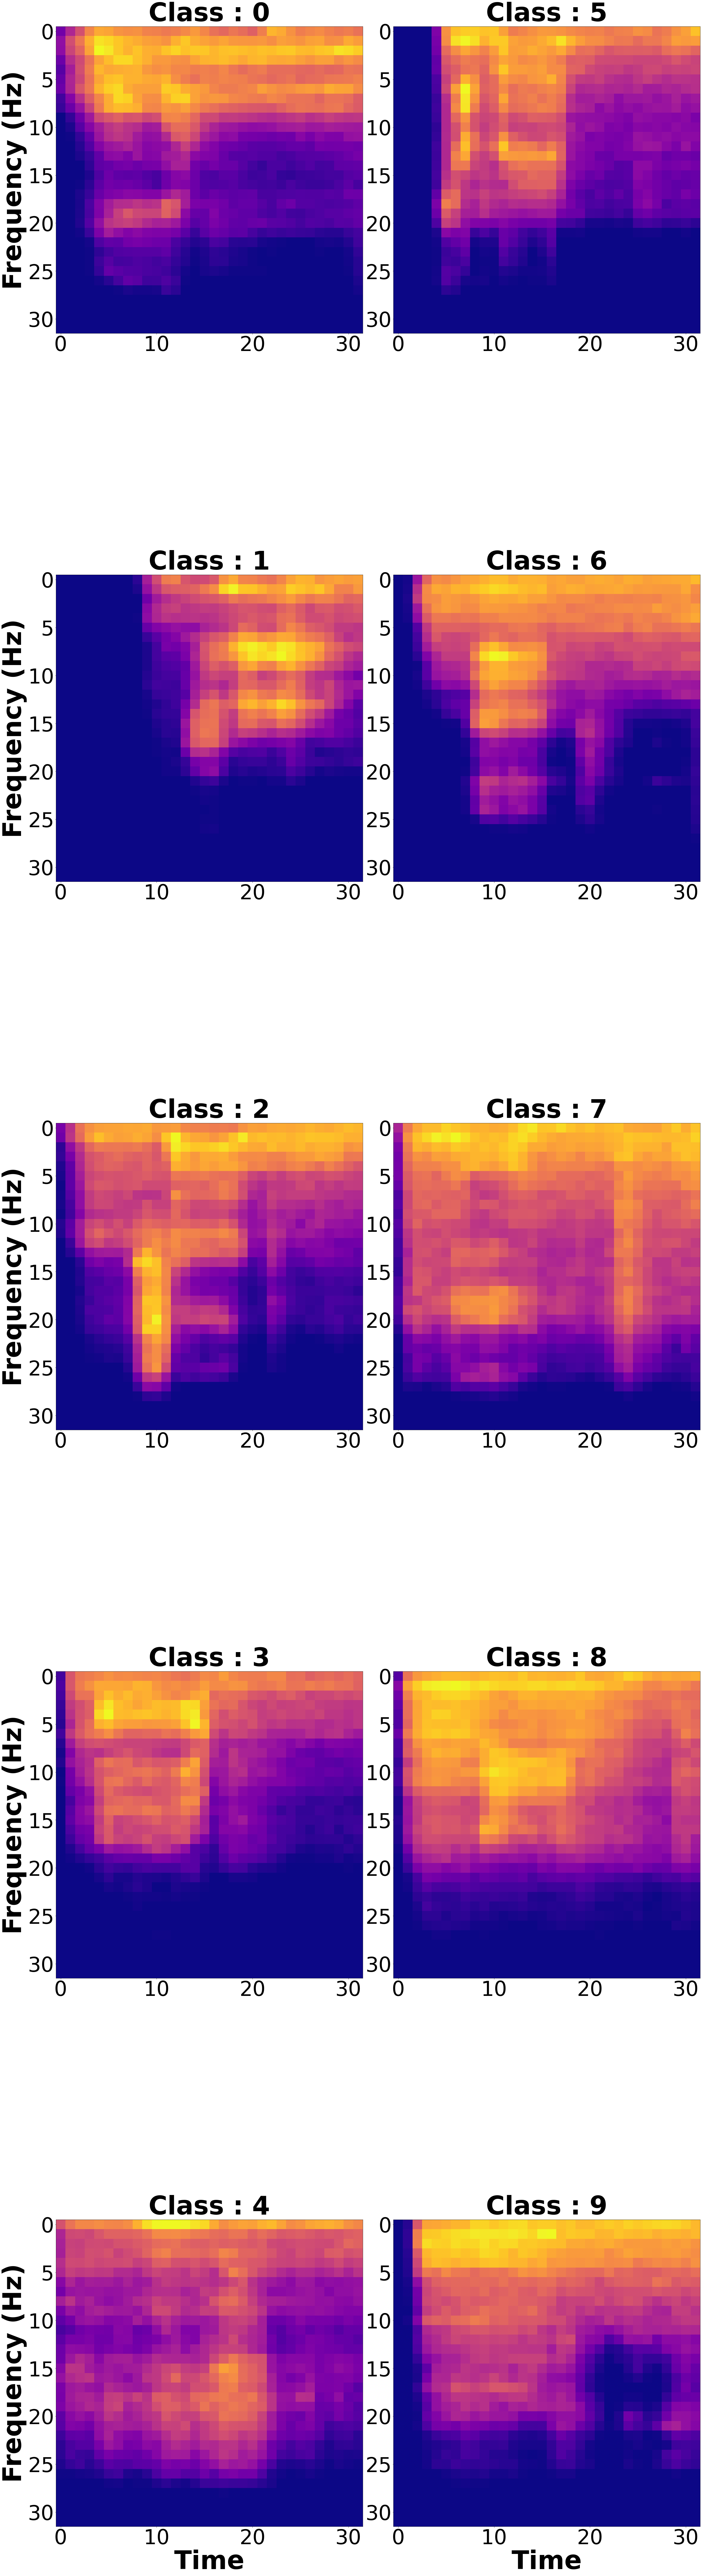

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import cv2
row=1
column=1
x=[]
for i in os.listdir("dataset"):
  count=0
  for j in os.listdir("dataset/"+i):
    # x.append(CalculateMelSpectrogram("dataset/"+i+"/"+j))
    y, sr = librosa.load("dataset/"+i+"/"+j,res_type='kaiser_fast')
    whale_song, _ = librosa.effects.trim(y)
    D = librosa.stft(y)  # STFT of y
    S_db = cv2.resize(librosa.amplitude_to_db(np.abs(D), ref=np.max), (32,32), interpolation = cv2.INTER_AREA)
    # librosa.display.specshow(S_db, x_axis='time', y_axis='log')
    # plt.colorbar()
    x.append(S_db)
    count+=1
    if count==1:
      break 
import matplotlib 
matplotlib.rc('xtick', labelsize=80) 
matplotlib.rc('ytick', labelsize=80)
plt.figure(1)
fig, axs = plt.subplots(5,2, figsize=(45, 190))
count=0
classes=0

# plt.figure(figsize=(70, 90))
k=0

plt.subplots_adjust(wspace=0.1, hspace=0.2)
for j in range(2):

  for i in range(5):
    axs[i,j].set_title("Class : "+str(classes),fontsize=100,fontweight="bold")
    if count==4 or count==9:
      axs[i,j].set_xlabel('Time',fontsize=100, fontweight="bold")
    if count<5:
      axs[i,j].set_ylabel('Frequency (Hz)',fontsize=100, fontweight="bold")
    axs[i,j].set_aspect('equal')
    axs[i,j].imshow(x[k], cmap="plasma")
    k+=1
    count+=1
    classes+=1


## MelSpectrogram visualization

In [ ]:
import numpy as np
x=np.load("X.npy",allow_pickle=True)
y=np.load("y.npy",allow_pickle=True)
print(x.shape, y.shape)


(23071, 32, 32) (23071,)


<Figure size 432x288 with 0 Axes>

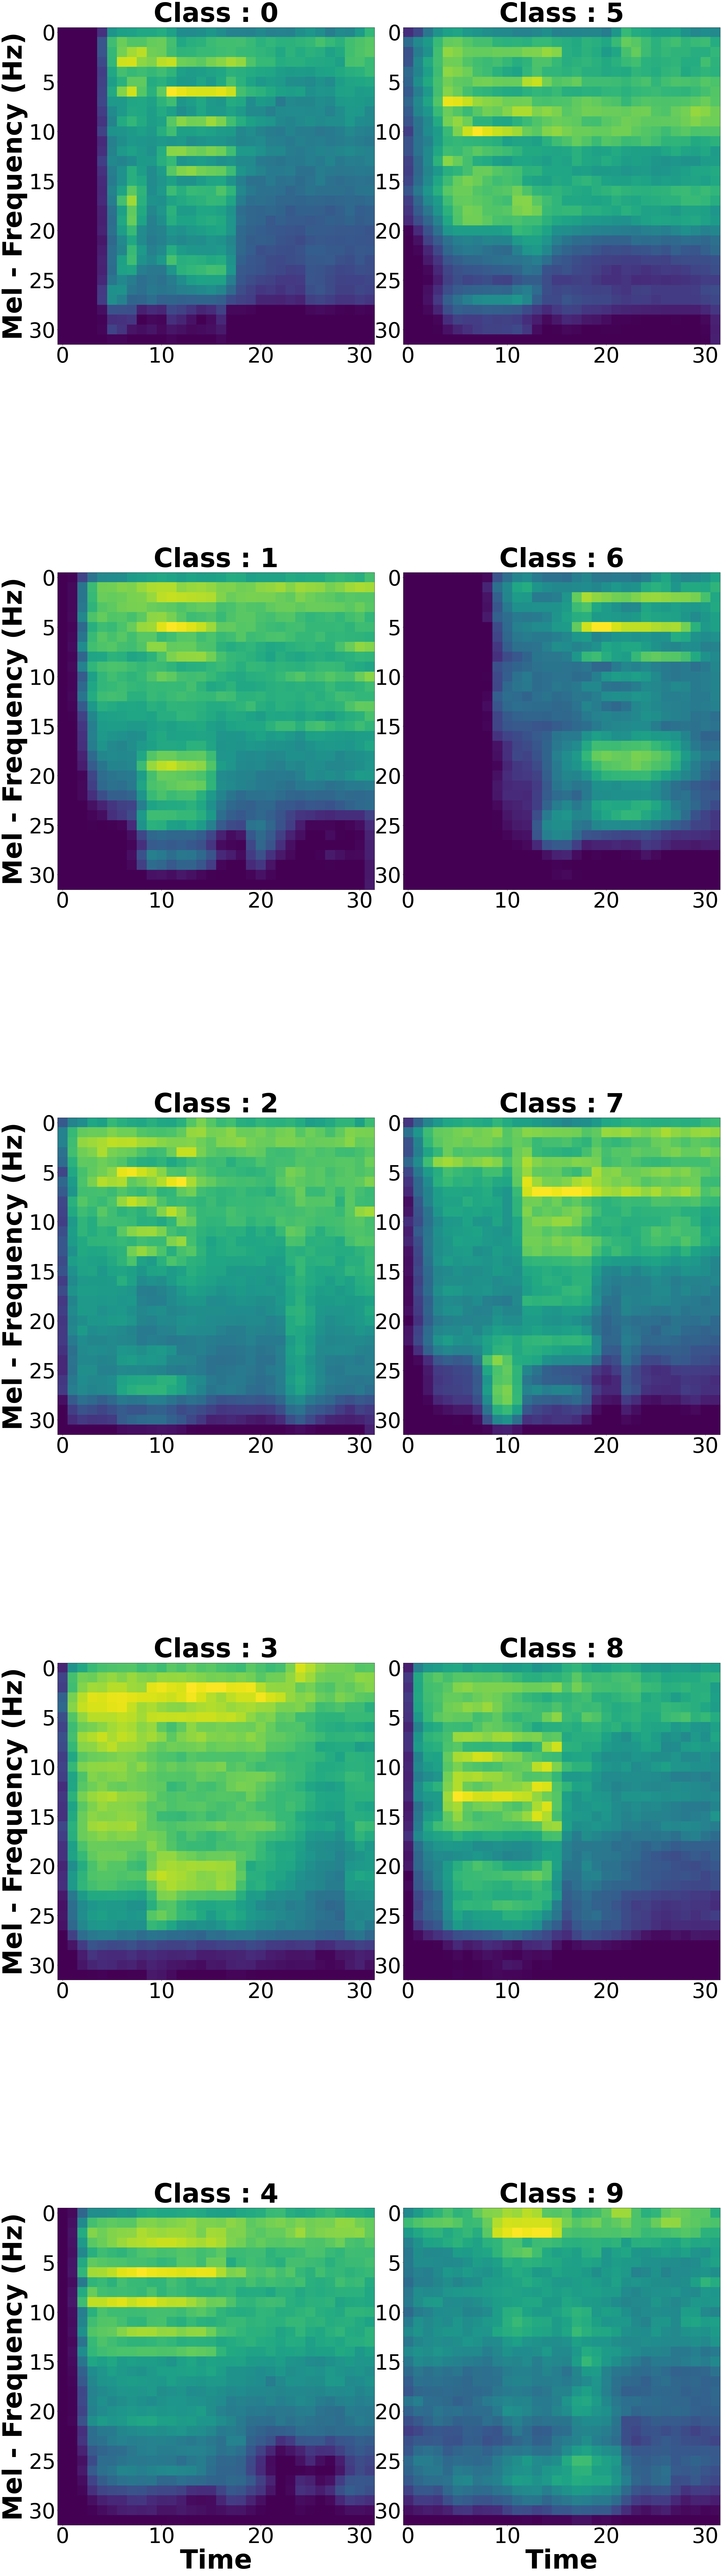

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# plt.figure(figsize=(10, 120))
import cv2
import matplotlib 
matplotlib.rc('xtick', labelsize=80) 
matplotlib.rc('ytick', labelsize=80)
row=1
column=1
plt.figure(1)
fig, axs = plt.subplots(5,2, figsize=(45, 190))
count=0
classes=0
# plt.figure(figsize=(70, 90))
k=0
# plt.rcParams.update({'font.size': 22})
plt.subplots_adjust(wspace=0.09, hspace=0.00000001)
for j in range(2):

  for i in range(5):
    axs[i,j].set_title("Class : "+str(classes), fontsize=100, fontweight="bold")
    if count==4 or count==9:
      axs[i,j].set_xlabel('Time',fontsize=100, fontweight="bold")
    if count<5:
      axs[i,j].set_ylabel('Mel - Frequency (Hz)',fontsize=100, fontweight="bold")
    axs[i,j].set_aspect('equal')
    axs[i,j].imshow(x[y==classes][0])
    k+=1
    count+=1
    classes+=1